In [1]:
import pandas as pd
import networkx as nx
import nxviz as nv 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#load the nx graph object, stored in a pickle file
G = nx.read_gpickle("who_follows_who_new2.pickle")

In [3]:
#inspect graph object
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


In [40]:
#create Erdos–Renyi random graph model with 78 nodes and 1223 edges (properties of real world twitter network)
G_renyi = nx.generators.random_graphs.erdos_renyi_graph(78,p=(1223/(78*77)), directed=True)
print(nx.info(G_renyi))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1226
Average in degree:  15.7179
Average out degree:  15.7179


In [8]:
#G_random=nx.gnm_random_graph(78,1223,directed=True)
#print(nx.info(G_random))

In [41]:
#check if there are any isolated nodes in random graph
isolated_nodes = list(nx.isolates(G_renyi))
isolated_nodes

[]

In [48]:
#Karate club graph as a real world socialnetwork reference model
G_social=nx.generators.social.karate_club_graph()
print(nx.info(G_social))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [67]:
random_graphs=[G_renyi, G]
names=["erdos-renyi", "twitter"]

In [15]:
#average degrees
degrees = G.degree()
degree_sum= sum(dict(degrees).values())
avg_degree=degree_sum/float(len(G))
avg_degree

31.358974358974358

In [68]:
result_df=pd.DataFrame(columns=["avg_degree", "density", "diameter",
                                "clustering coeff", "reciprocity", "triadic closure"])

In [69]:
for n,g in zip(names,random_graphs):
    #sanity check: avg degree of graphs (needs to be the same for comparision)
    degrees = g.degree()
    degree_sum= sum(dict(degrees).values())
    avg_degree=degree_sum/float(len(g))
    
    print('Mean Degree', np.mean( [g.degree(n) for n in g.nodes()] ),
      'Median Degree', np.median( [g.degree(n) for n in g.nodes()] ),
      'Max Degree', np.max( [g.degree(n) for n in g.nodes()] ),
      'Min Degree', np.min( [g.degree(n) for n in g.nodes()] ) )
    
    result_df.loc[n] = [avg_degree, 
                        nx.density(g), 
                        nx.diameter(g.to_undirected()),  
                        nx.average_clustering(g), 
                        nx.algorithms.overall_reciprocity(g),
                        nx.transitivity(g)]

Mean Degree 31.435897435897434 Median Degree 32.0 Max Degree 43 Min Degree 21
Mean Degree 31.358974358974358 Median Degree 32.5 Max Degree 83 Min Degree 1


In [70]:
result_df

,avg_degree,density,diameter,clustering coeff,reciprocity,triadic closure
erdos-renyi,31.435897,0.204129,2.0,0.202312,0.202284,0.202249
twitter,31.358974,0.203630,5.0,0.524672,0.783320,0.493619


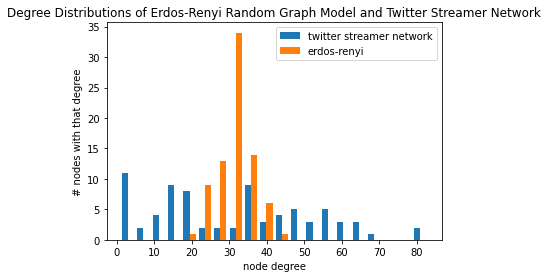

In [72]:
plt.title("Degree Distributions of Erdos-Renyi Random Graph Model and Twitter Streamer Network")
plt.hist([list([G.degree(n) for n in G.nodes()]),
          #list([G_social.degree(n) for n in G_social.nodes()]),
         list([G_renyi.degree(n) for n in G_renyi.nodes()])], 
         bins=20, label=["twitter streamer network",
                         #"karate club", 
                         "erdos-renyi"])
plt.xlabel("node degree")
plt.ylabel("# nodes with that degree")
plt.legend(loc='upper right')
plt.show()

## Small World Property

In [ ]:
g_sigma = nx.algorithms.smallworld.sigma(G.to_undirected()) #C/Cr
g_omega = nx.algorithms.smallworld.sigma(G.to_undirected())

In [ ]:
g_rand_sigma = nx.algorithms.smallworld.sigma(G_random.to_undirected())
g_rand_omega = nx.algorithms.smallworld.sigma(G_random.to_undirected())

In [ ]:
import community

In [ ]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]